In [ ]:
# downloadign kaggle and stuff

# !pip install kaggle
from google.colab import files

uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d joyee19/studentengagement
!unzip studentengagement.zip -d sten

 99% 38.0M/38.3M [00:00<00:00, 159MB/s]
100% 38.3M/38.3M [00:00<00:00, 164MB/s]
Archive:  studentengagement.zip
  inflating: sten/Student-engagement-dataset/Engaged/confused/0020.jpg  
  inflating: sten/Student-engagement-dataset/Engaged/confused/0021.jpg  
  inflating: sten/Student-engagement-dataset/Engaged/confused/0032.jpg  
  inflating: sten/Student-engagement-dataset/Engaged/confused/0033.jpg  
  inflating: sten/Student-engagement-dataset/Engaged/confused/0034.jpg  
  inflating: sten/Student-engagement-dataset/Engaged/confused/0035.jpg  
  inflating: sten/Student-engagement-dataset/Engaged/confused/0036.jpg  
  inflating: sten/Student-engagement-dataset/Engaged/confused/0037.jpg  
  inflating: sten/Student-engagement-dataset/Engaged/confused/0038.jpg  
  inflating: sten/Student-engagement-dataset/Engaged/confused/0039.jpg  
  inflating: sten/Student-engagement-dataset/Engaged/confused/0040.jpg  
  inflating: sten/Student-engagement-dataset/Engaged/confused/0041.jpg  
  inflating:

### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import os
from tensorflow.keras.preprocessing import image


In [ ]:
import os

directory_path = '/content/sten/Student-engagement-dataset/Looking Away'

files = os.listdir(directory_path)
for file_name in files:
  if '_' in file_name:
      file_path = os.path.join(directory_path, file_name)
      os.remove(file_path)
      print(f"Deleted file: {file_name}")

In [ ]:
# shutil.rmtree('/content/sten/test')

# shutil.rmtree('/content/sten/train')
import shutil
import os

# Define the path to the main directory
main_directory = '/content/sten/Student-engagement-dataset'

# List all subdirectories in the main directory
subdirectories = [d for d in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, d))]

# Loop through each subdirectory
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(main_directory, subdirectory)

    # List all sub-subdirectories in the current subdirectory
    sub_subdirectories = [d for d in os.listdir(subdirectory_path) if os.path.isdir(os.path.join(subdirectory_path, d))]

    # Move each sub-subdirectory up one layer
    for sub_subdirectory in sub_subdirectories:
        sub_subdirectory_path = os.path.join(subdirectory_path, sub_subdirectory)
        destination_path = os.path.join(main_directory, sub_subdirectory)

        # Move the sub-subdirectory
        shutil.move(sub_subdirectory_path, destination_path)

    # Remove the now empty subdirectory
    os.rmdir(subdirectory_path)

In [ ]:
# adding a bunch more images using augmentation
# very good that all the original images do not containe underscores, else it would be over

dataset_dir = '/content/sten/Student-engagement-dataset'

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
)
counter = 0

for class_folder in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_folder)

    for image_name in os.listdir(class_path):
        if '_' not in image_name:
            image_path = os.path.join(class_path, image_name)
            img = image.load_img(image_path)
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)

            print(f"processing: {image_path}")

            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=class_path, save_prefix=image_name.split('.')[0], save_format='jpg'):
                # ?? what is this code. This is terrible
                i += 1
                counter += 1
                print(f"counter: {counter}")
                if i >= 1:
                    break


processing: /content/sten/Student-engagement-dataset/Looking Away/0468.jpg
counter: 1
processing: /content/sten/Student-engagement-dataset/Looking Away/0386.jpg
counter: 2
processing: /content/sten/Student-engagement-dataset/Looking Away/0104.jpg
counter: 3
processing: /content/sten/Student-engagement-dataset/Looking Away/0214.jpg
counter: 4
processing: /content/sten/Student-engagement-dataset/Looking Away/0481.jpg
counter: 5
processing: /content/sten/Student-engagement-dataset/Looking Away/0424.jpg
counter: 6
processing: /content/sten/Student-engagement-dataset/Looking Away/0239.jpg
counter: 7
processing: /content/sten/Student-engagement-dataset/Looking Away/0460.jpg
counter: 8
processing: /content/sten/Student-engagement-dataset/Looking Away/0402.jpg
counter: 9
processing: /content/sten/Student-engagement-dataset/Looking Away/0487.jpg
counter: 10
processing: /content/sten/Student-engagement-dataset/Looking Away/0354.jpg
counter: 11
processing: /content/sten/Student-engagement-dataset

Here is some boilerplate to split into train and test splits. Awesome

In [ ]:
import os
from sklearn.model_selection import train_test_split
import shutil

# Set your root directory
root_directory = "/content/sten/Student-engagement-dataset"

# Initialize lists to store file paths and corresponding labels
file_paths = []
labels = []

# Iterate through each label folder
for label in os.listdir(root_directory):
    label_path = os.path.join(root_directory, label)

    # Check if it's a directory
    if os.path.isdir(label_path):
        # Iterate through files in the label folder
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)

            # Append file path and corresponding label
            file_paths.append(file_path)
            labels.append(label)

# Split the dataset into train and test sets
train_paths, test_paths, train_labels, test_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

# Create directories for train and test sets
train_dir = "/content/sten/train"
test_dir = "/content/sten/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Move files to train directory
for path, label in zip(train_paths, train_labels):
    destination = os.path.join(train_dir, label)
    os.makedirs(destination, exist_ok=True)
    shutil.move(path, destination)

# Move files to test directory
for path, label in zip(test_paths, test_labels):
    destination = os.path.join(test_dir, label)
    os.makedirs(destination, exist_ok=True)
    shutil.move(path, destination)

In [ ]:


train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rescale=1./255,
    validation_split=0.2,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:
IMG_SIZE = 48
BATCH_SIZE = 32

##Testing the image augmentation here


/content/sten/train/Looking Away/0056_0_7186.jpg


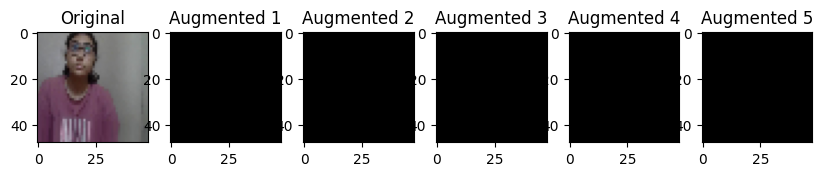

In [ ]:


image_dirs = [os.path.join(train_dir, file) for file in os.listdir(train_dir)]

# Choose one image file as an example
example_dir = image_dirs[0]
image_files = [os.path.join(example_dir, file) for file in os.listdir(example_dir)]
example_file = image_files[0]
print(example_file)
img = image.load_img(example_file, target_size=(IMG_SIZE, IMG_SIZE))

img_array = image.img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)

augmented_generator = train_datagen.flow(img_array, batch_size=1)

augmented_images = [next(augmented_generator)[0].astype(int) for _ in range(5)]

plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 6, 1)
plt.imshow(img)
plt.title('Original')

# Augmented images
for i in range(5):
    plt.subplot(1, 6, i + 2)
    plt.imshow(augmented_images[i].astype('uint8'))
    plt.title(f'Augmented {i + 1}')

plt.show()

In [ ]:

train_dir = '/content/sten/train'
test_dir = '/content/sten/test'

# setting up the flow from directories
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size=(IMG_SIZE,IMG_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    color_mode="grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training")
validation_generator = validation_datagen.flow_from_directory(directory = test_dir,
                                                    target_size=(IMG_SIZE,IMG_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    color_mode="grayscale",
                                                    class_mode = "categorical",
                                                    subset = "validation")

Found 2716 images belonging to 6 classes.
Found 165 images belonging to 6 classes.


In [ ]:
classes = os.listdir(train_dir)
print(f'Number of classes: {len(classes)}')
print('Class names:', classes)

Number of classes: 6
Class names: ['Looking Away', 'bored', 'frustrated', 'drowsy', 'engaged', 'confused']


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam

base_model = Sequential()

input_layer = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 1))

# Conv layer 1
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

# Conv layer 2
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

# Conv layer 3
x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

# Dense layer 1
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

output_layer = Dense(6, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 46, 46, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 44, 44, 64)        256       
 chNormalization)                                            

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=4, min_delta=0.01, mode='min', baseline=1.15, restore_best_weights=True)

checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback, early_stopping]
)

Epoch 1/30
85/85 [==============================] - ETA: 0s - loss: 0.3210 - accuracy: 0.8785
Epoch 1: val_accuracy improved from -inf to 0.81212, saving model to model_weights.h5
85/85 [==============================] - 13s 157ms/step - loss: 0.3210 - accuracy: 0.8785 - val_loss: 0.4979 - val_accuracy: 0.8121
Epoch 2/30
85/85 [==============================] - ETA: 0s - loss: 0.3132 - accuracy: 0.8752
Epoch 2: val_accuracy did not improve from 0.81212
85/85 [==============================] - 13s 152ms/step - loss: 0.3132 - accuracy: 0.8752 - val_loss: 1.6026 - val_accuracy: 0.6424
Epoch 3/30
85/85 [==============================] - ETA: 0s - loss: 0.2771 - accuracy: 0.9017
Epoch 3: val_accuracy did not improve from 0.81212
85/85 [==============================] - 13s 152ms/step - loss: 0.2771 - accuracy: 0.9017 - val_loss: 1.6980 - val_accuracy: 0.4424
Epoch 4/30
85/85 [==============================] - ETA: 0s - loss: 0.2698 - accuracy: 0.8965
Epoch 4: val_accuracy did not improve fr

### Plotting some stuff using matplotlib code i found online

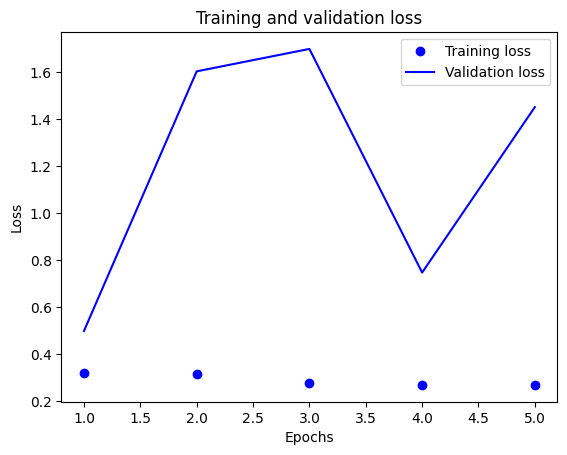

In [ ]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

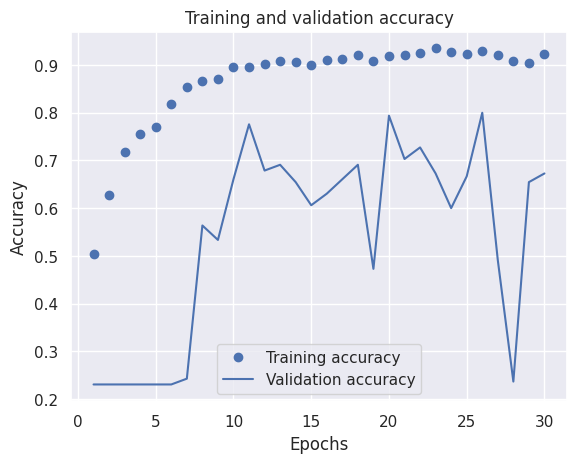

In [ ]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

6/6 [==============================] - 1s 95ms/step


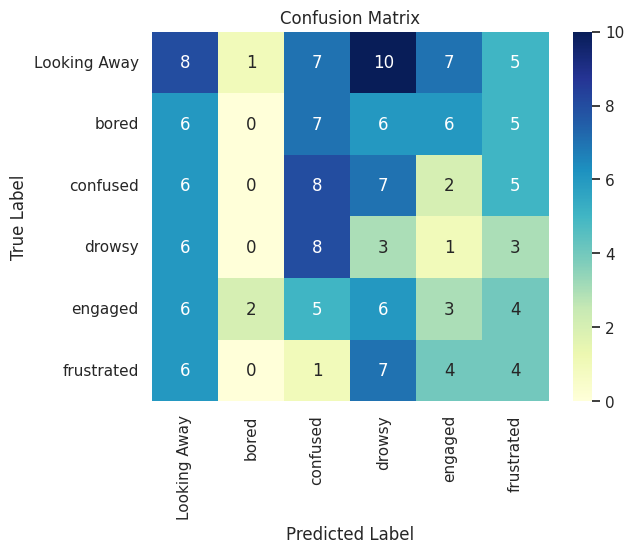

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

###Timing it

In [ ]:
import time

img_path = '/content/sten/test/engaged/0009.jpg'

img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')

img_array = img_to_array(img)
img_array = img_array.reshape((1, IMG_SIZE, IMG_SIZE, 1))

img_array = img_array/255.0

start_time = time.time()
prediction = model.predict(img_array)
end_time = time.time()

model.save('model_weights.h5')

used_time = end_time - start_time

print("Used ", used_time, " seconds")

print("Predicted ", np.argmax(prediction))

1/1 [==============================] - 0s 357ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Used  0.43450140953063965  seconds
Predicted  4
